---
# <center>Problem Statement</center>

A Lesotho automobile company Thabure Autos aspires to expand operations and enter the South African auto market; so the company plans on setting up their manufacturing unit there and producing cars locally to give competition to the already available counterparts in South Africa.

In their efforts to understand the factors on which the pricing of cars depends, Thabure Autos has contracted Deiv Data Consultancy (DDC), a data consulting firm. Specifically, they want to understand the factors affecting the pricing of cars in the South African market, since those may be very different from the Lesotho market. So the company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car 
- Can we visualize the predicted vs. actual price values
- Which model yields better scores

Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the South African market.


## Project Goal
- To predict the price of cars using the available independent variables.

We could ask questions like:
 * What features affect the price of a car? 
     * Is it the color, the brand, or year of make?
     * Could it be the horsepower, or perhaps something else?

The model to predict the prices of cars will be used by management to understand exactly how prices vary with independent variables. 

With the model at hand, Thabure Autos can manipulate the design of the cars, their business strategies, and many more, to meet certain price levels. In addition, the model will be a good way for management to understand the pricing dynamics of a new, foreign market. 


---
# Data Preprocessing 

The technique used to transform raw data into useful, understandable and efficient format.

It can comprise of the following
1. Importing necessary libraries
2. Importing the dataset
3. Data Cleaning
4. Data Transformation
5. Data Reduction

## 1. Importing Libraries
Let's go ahead and import some libraries that we will make use of in our quest to archieve our goal. 


In [ ]:
# Importing essential starter libraries
import numpy as np      # vectors and matrices
import pandas as pd     # tables and data manipulations
import seaborn as sns

# For Dates
import datetime
from scipy.optimize import minimize                 # for function minimization
from dateutil.relativedelta import relativedelta    # working with dates with style

# Sklearn libraries
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

# statistics and econometrics
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose

# Visualization Libraries
import seaborn as sns # more plots
import matplotlib.pyplot as plt # plots
# plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

# some useful functions
from itertools import product
from tqdm import tqdm_notebook
import warnings # `do not disturb` mode
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(15,12)})

# To have graphs embedded in the notebook
%matplotlib inline

# Print the graphs as PDF and PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# Center graph outputs
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

## 2. Loading the dataset

In [ ]:
# Import data
df = pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')

## 3. Data Cleaning 
**What is Data Cleaning?**

In Data Science, data cleaning can be described in many ways, one of them being: ***`the process of fixing and/or removing incorrect, corrupted, wrongly-formatted, incomplete or duplicate data within a dataset`***. 

Quite mouthful and yet comprehensive. We want to ensure that our dataset has no duplicate data or does not contain any corrupted entries that will otherwise lead to wrong/less useful models. 

As we make use of multiple data sources in data analysis, the chances of duplicating data are very high, and so are those of mislabeling the data. It goes without saying that incorrect data leads to unreliable algorithms and predictions or outcomes. While there are no sure steps of going about data cleaning due to the nature of different datasets, it is however vital to build some sort of a framework or template for data cleaning process for future references so as to at least be close to doing it right each time. 

### 3.1 Exploring The Dataset
- **Understanding the data**

With the data fed into our notebook, it's time we take a look at it: we need to spend some time exploring it in order to understand what the features represent in each column. We want to avoid or at least minimize mistakes in the data analysis and the modeling process. 

Without any further ado, let's dive into our loaded dataset.

In [ ]:
# View the first 5 rows
df.head()

#### About the features
-  **What do the features mean?**

 * **Car_ID**          : Unique `id` of each car - `Integer`
 * **Symboling**       : Assigned insurance risk rating- +3 indicates risky auto; -3 indicates a less risky auto - `Categorical`
 * **CarName**	       : Name of the car - `Categorical`
 * **Fueltype**	       : Type of Fuel a car uses - `Categorical`
 * **Aspiration**      : Aspiration used in a car - `Categorical`
 * **Doornumber**      : Number of doors in a car - `Categorical` 
 * **Carbody**         : The body of the car - `Categorical`
 * **Drivewheel**      : Type of drive wheel - `Categorical`	
 * **Enginelocation**  : Location of a car engine - `Categorical`	
 * **Wheelbase**	   : Wheelbase of a car - `Numeric`
 * **Carlength**	   : Length of the car - `Numeric`
 * **Carwidth**	       : Width of the car - `Numeric`
 * **Carheight**       : Height of car - `Numeric`
 * **Curbweight**      : The weight of a car without occupants or baggage - `Numeric`
 * **Enginetype**	   : Type of engine - `Categorical`
 * **Cylindernumber**  : Cylinder placed in the car - `Categorical`	
 * **Enginesize**      : Size of the car engine - `Numeric`
 * **Fuelsystem**	   : Fuel system of car - `Categorical`
 * **Boreratio**	   : Boreratio of a car - `Numeric`
 * **Stroke**	       : Stroke or volume inside the engine - `Numeric`
 * **Compressionratio**: Compression ratio of a car - `Numeric`
 * **Horsepower**	   : Horsepower - `Numeric`
 * **Peakrpm**	       : Car peak rpm - `Numeric`
 * **Citympg**	       : Mileage in the city - `Numeric`
 * **Highwaympg**	   : Mileage on highway - `Numeric`
 * **Price**           : Price of the car - `Numeric`; **Dependent variable**
 
 #### Let's try understand the shape of the dataframe
 - i.e, *how many rows and columns in the given dataset?*


In [ ]:
# Dataframe shape: how many rows and columns in the given dataset?
print("There are", df.shape[0], "rows/entries and", df.shape[1], "features in our dataframe.")

#### Information About the Dataset
Now that we know how entries and features we are looking at, let's try learn more about the features themselves- their data types: are there integer values, object or floating data types?

In [ ]:
# Data set Info
df.info()

We see from the above under the **`Non-Null Count`** that there are 205 entries, as we already saw and that there no missing values for each feature. 
`dtypes` nicely summarizes for us that there are
> * 8 floating data type features

> * 8 features with integer values and 

> * 10 of object data type.

#### MISSING DATA
Let us check if there are missing values for each feature.


In [ ]:
# check if there are missing values in our data
df.isnull().sum()

$Observation$:

There are no NULL values under each feature.

#### Any missing Values?

In [ ]:
# Are there any rowns with missing values?
df[df.isnull().any(axis=1)]

Luckily enough, this dataset has no missing values; this rearely happens however- data rarely come ready to use. Datasets, whether big or small, come with myriad kinds of issues- it be missing values, invalid fields, repeated fields or entries, wrong datatype compared to the rest of other entries in the same column, you name them. 

That said, in this dataset there seems to be no immediate work to do to clean data, so we move on.
#### Statistical Summary of the dataset

In [ ]:
# summary statistics
df.describe()

#### Unique Entries
- Let's unique entries in our dataset

In [ ]:
#Identifying the unique number of values in the dataset
df.nunique()

---
### Feature Filtering
#### Dropping Features Not Related to the Target/Dependent Variable

Not all features are are correlated with the dependent variable, and from our list of features `car_ID` stands out. So, we will have to drop it as it serves as a mere reference; thus can be dropped.

In [ ]:
# Drop car_ID 
df = df.drop('car_ID', axis=1)
df.head()

- We indeed see from the above that `car_ID` variable has been dropped from our dataframe. 

---
### Target Variable Outlier Analysis/Detection
* **What is Outlier Analysis**
  - This is the data analysis process of identifying the anomalous observations in a dataset. An outlier is an extreme value that deviates from from other observations in the dataset. 
  
  - This process removes inaccurate or erroneous observations which might otherwise lead to skewed conclusions, leading to poor business decisions and a potential loss of revenue. 

In [ ]:
# Outlier Analysis
plt.figure(figsize = [15,5])
sns.boxplot(data=df['price'], orient="h", palette="Set1", color="red")
plt.title("Price Variable Distribution", fontsize = 20, fontweight = 'bold')
#plt.xlabel("Price Range", fontsize = 15, fontweight= 'bold')
#plt.ylabel("Continuous Variable", fontsize = 15, fontweight= 'bold')
plt.show()

- We see that there are outliers in our target `price`: some car prices are above $30, 000$.
--- 
### Auto Comapy Names 
We'll notice that in our dataframe, there is no column specifying car company names, just car names. Because we want to know which auto company is famous or sells more, we will want to **extract company name from car names**. Let's go ahead and do just that. 

In [ ]:
# Extracting Auto Company names from carName
df['CarName'] = df['CarName'].str.split(' ', expand=True)
df.head()

##### Available Auto Companies in our Dataset
Let's take a look at which auto companies with have in  our dataset. 


In [ ]:
# Unique car companies
arr = df['CarName'].unique()

# Turn the above into a DataFrame
df1 = pd.DataFrame(arr, columns=["Auto Company Name"])
df1.reset_index(drop=True, inplace=True)
df1

It becomes apparent from the above DataFrame of "unique" Auto Companies that some company names have been mispelled, or short-cut (vw for instance). So we need to rename such accordingly. 

Here is the list of typing mistakes:
1. maxda $\implies$ mazda 
2. Nissan $\implies$ nissan
3. porcshce $\implies$ porsche
4. toyouta $\implies$ toyota
5. vokswagen $\implies$ vw $\implies$ volkswagen

So let's go ahead and correct the mistakes.

In [ ]:
# Correcting the typing errors observed
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

Let's check if the changes took effect, let's concatenate them together for easier comparison so we can see if the changes happened. 

In [ ]:
# Unique car companies
arr1 = df['CarName'].unique()

# Turn the above into a DataFrame
df2 = pd.DataFrame(arr1, columns=["Updated Auto Company Name"])
df3 = pd.concat([df1, df2], axis=1)
df3

- Indeed! We have successfully corrected the typing mistakes. 

### Changing datatypes of some features
- **`Symboling`**
> It is categorical in nature so we will have to change the entries from integer to string datatype

In [ ]:
# Datatype change
df['symboling'] = df['symboling'].astype(str)

# To check if the change took effect
if df['symboling'].dtype == 'object':
    print("Symboling datatype has been changed successfully.")
else:
    print("Changes failed")

### Duplicates
Let's check if there are duplicate in our dataset.

In [ ]:
# Check for Duplicates
print("There are", df.duplicated().sum(),"duplicates in this dataset.")

## Data Categorization
As we have already seen, our dataset comprises categorical and numerical data; so we want to split features into such for better analysis. 

> #### Extracting Numerical Features
Let's get those features that are of numerical datatype.

In [ ]:
# Numerical Segregation
num_cols = df.select_dtypes(exclude=['object']).columns
df_num = df[num_cols]
df_num.head()

> #### Extracting Categorical Features
Let's get those features that are of categorical        datatype


In [ ]:
# Numerical Segregation
cat_cols = df.select_dtypes(include=['object']).columns
df_cat = df[cat_cols]
df_cat.head()

Now that we have segregated our dataset into different datatypes, let's see how many features are in each categorization.

In [ ]:
print("Numerical Category has", df_num.shape[1], "features, while Categorical segregation has", df_cat.shape[1],".")

---
---
# <center>Exploratory Data Analysis</center>
Exploratory Data Analysis (EDA) is the philosophy of analyzing datasets to to summerize their main characteristics, usually employing graphs and data vizualization techniques[ [1] ](https://en.wikipedia.org/wiki/Exploratory_data_analysis).

This is the critical first step in analyzing the data; here are some reasons for using EDA:
  * Detection of mistakes
  * Determining relationships among the features
  * Assessing assumptions on which statistical inference will be based, etc. 
  
It is worth noting that EDA is not really a formal process with rigid set of rules or path to follow, it is waht one makes it. The aim is to uncover whatever may be hidden in the data, so one should feel free to investigate whatever idea that comes to mind. Of course some ideas will yield some positive outcomes, others not so much. To successfully perform data cleaning, we'll need to deploy EDA tools such as visualisation, transformation and modelling. 
  


In [ ]:
# Minimum price
print("The Minimum price of the car in this dataset is $", round(df['price'].min()))
# Maximum price
print("The Maximum price of the car in this dataset is $", round(df['price'].max()))

### Different Car Names & Visualization
#### Number of Cars Sold By Each Auto Company
- **Which Auto Company seems to be famous or selling more according to our dataset?**

In [ ]:
# Cars sold by each Auto Company
#df.CarName.value_counts()
# Turn into DataFrame
df_carnames = pd.DataFrame(df['CarName'].value_counts()).reset_index().rename(columns={'index':'car_name','CarName': 'count'})
df_carnames

#### Visualization of the above

In [ ]:
df_carnames = pd.DataFrame(df['CarName'].value_counts()).reset_index().rename(columns={'index':'car_name','CarName': 'count'})
df_carnames

In [ ]:
# Visualizing Number of car per automaker
num_cars = sns.barplot(y='car_name', x='count', data=df_carnames)
num_cars = plt.setp(num_cars.get_xticklabels(), rotation=75)
plt.xlabel("Count", fontsize = 15, fontweight= 'bold')
plt.ylabel("Car Name", fontsize = 15, fontweight= 'bold')
plt.title("Number of Cars by Each Manufacturer", fontname ='Times New Roman', size = 12, color ='purple')

We see that:
- Toyota is the highest selling car, a competition to beat for many manufacturers 
- Mercury isn't so popular. 

## Correlations
### Meaning Of Positive, Negative, and Zero Correlation Coefficients 

Correlation coefficients are indicators of the strength of the linear relationship between two different variables, $x$ and $y$. 
   - A linear correlation coefficient that is greater than zero indicates a positive relationship. 
   - A value that is less than zero signifies a negative relationship. 
   - Finally, a value of zero indicates no relationship between the two variables $x$ and $y$.

**IMPORTANT**: When interpreting correlation, it's important to remember that just because two variables are correlated, it $does$ $not$ mean that one causes the other.
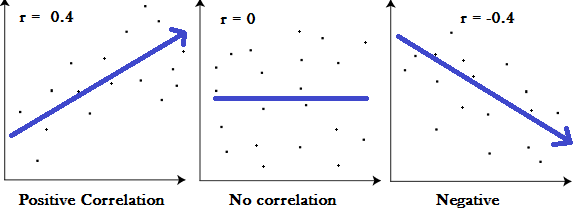


### Features Correlation
Let us dig deeper: let us try find the correlation between the features with respect to `price`. 

We will pick some features at random and try uncover some useful insights, not losing focus of our end-goal: **Car Pricing.**
 
#### <center>Visualizing Numerical Features</center>
Let's list features we classified as numerical and some explanations of some we may not fully understand:
<ol>
     <li>$wheelbase$: <i><font color='blue'>the horizontal distance between the centers of the front and rear wheels</font>
         </i>
     </li>
     <li>$carlength$</li>
     <li>$carwidth$</li>	
     <li>$carheight$</li>	
     <li>$curbweight$: <i><font color='blue'>simply the weight of the vehicle while it's resting on the curb and not in use;</font>
     </i></li>
     <li>$enginesize$: <i><font color='blue'>also known as engine capacity,  the total volume of the cylinders in the engine;</font>
     </i>
     </li>
     <li>$boreratio$: <i><font color='blue'>the cylinder bore is the diameter of each cylinder</font>
     </i>
    </li>
    <li>$stroke$: <i><font color='blue'>the shorter the stroke, the more power it can make and so the faster is the car. We'll see if that makes the cost of the car higher or lower</font>
     <li>$compressionratio$: <i><font color= 'blue'>Higher compression ratios and combustion efficiency mean more power with less fuel, so an energy-saving car. Will those kinds be more costly or cheap?</font>   
      </i>
        </li>
      <li>$horsepower$</li>
      <li>$peakrpm$: <i><font color='blue'>$rmp$ measures how many times the engine’s crankshaft makes one full rotation every minute, and along with it, how many times each piston goes up and down in its cylinder; in simple terms, rmp stands for revolutions per minute, and it’s used as a measure of how fast any machine is operating at a given time. Will it affect the price? Let's find out.</font>
      </i></li>
      <li>$citympg$:<i><font color='blue'>$mpg$ stands for miles per gallon- the distance, measured in miles, that a car can travel per gallon of fuel. It measures car's fuel efficiency, higher a car's MPG, the more fuel efficient it is. So $City$ $MPG$ is the score a car will get on average in city conditions, with stopping and starting at lower speeds.</font>
      </i></li>
      <li>$highwaympg$: <i><font color='blue'>the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.</font>
      </i></li>
<ol>
    
    
<body>With a better understanding of what all this auto jagon means, let's try to see how these impact the price. $Remember$, we want to see which features affect the price so we can keep or discard them. 
</body>


### Wheel Base $vs.$ Price
Let's see how wheel base impacts car pricing:

**<font color='red'>Scatter Plot and Linear Regression Model Fit</font>**

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 4))
# Regression Plot
sns.regplot(x='wheelbase', y='price', data=df_num, 
            scatter_kws = {'color': 'purple', 'alpha':0.3}, 
            line_kws = {'color': '#CCCC00', 'alpha':0.89, 'lw':6})
plt.title("Wheelbase vs. Price", fontname ='Times New Roman', size = 25, color ='purple')
plt.xlabel("Wheel Base", fontname ='Times New Roman', size = 15, color ='blue')
plt.ylabel("Price", fontname ='Times New Roman', size = 15, color ='blue')
sns.set_style('whitegrid')
plt.show()

With the above visualization, seaborn calculated and plotted a linear regression model line of fit, along with a translucent 95% confidence interval band. We can set the confidence interval to any integer in $[0, 100]$, or None.

In [ ]:
# pairplot without hue
plt.figure(figsize=(10, 4))
sns.pairplot(df_num, x_vars=['wheelbase', 'price', ], 
             y_vars=['wheelbase', 'price'],
             diag_kind="kde", 
             plot_kws=dict(marker="o", linewidth=1))
# to show
plt.show()
print("Correlation of wheel base to price is", round(df_num['wheelbase'].corr(df_num['price']), 4))

We see that the correlation is $0.05778$, which is a moderate correlation- this would imply that wheel base does little to pricing a car, but can't be ignored entirely- at least not yet.

The pairs plot builds on the kde and the scatter plot. 
- The kde on the diagonal allows us to see the distribution of a single variable(price in this case) while 
- The scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. For example, the left-most plot in the last row shows the scatter plot of `wheelbase` $vs.$ `price`.


---
### Car Length, Width & Height $vs.$ Price
#### Pairplots

In [ ]:
plt.style.use('seaborn')
# pairplot of the car length, width and height
auto_dims = sns.pairplot(df_num, x_vars=['carlength', 'carwidth','carheight', 'price', ], 
             y_vars=['carlength', 'carwidth', 'carheight', 'price'],
             #diag_kind="auto",
             diag_kws=dict(fill=True, color="magenta"),
             plot_kws=dict(marker="o", linewidth=1, color='red', alpha=0.3))
auto_dims.map_upper(sns.regplot, color="green")
auto_dims.map_lower(sns.kdeplot, cmap="Reds")
auto_dims.map_diag(plt.hist, density ='True', bins = 10, color = 'purple')
# to show
plt.show()

#### Heat Maps

In [ ]:
# Select carlength, carwidth, carheight only
df_cardims = df_num.iloc[:,1:4]
# Add price column to the selected columns
df_cardims['price'] = df_num['price']
# Find their correlation matrix
df_cardims_corr = df_cardims.corr().round(5)
# Make a heatmap
#sns.heatmap(df_cardims_corr, annot = True, center=1, linewidths=1)
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.heatmap(df_cardims_corr, cbar=True, square= False, 
                 fmt='.1f',
                 annot=True, annot_kws={'size':15}, cmap='Accent')
plt.title("Car Dimensions correlation to Price", size=25, fontname ='Times New Roman', color ='purple')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [ ]:
df_cardims_corr
# Correlation of features vs price only
# Set thrashhold: anything greater or equal to 0.5 is good
threshold = 0.5 
c = abs(df_cardims_corr['price'])
output_c = pd.DataFrame(c[c>threshold])
output_c

#### $Observation$
- We see that car height has very weak correlation with price- we could say that car pricing does not depend much on car height.
- Let's get a visualization for better understanding:

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 5))
# Regression Plot
sns.regplot(x='carheight', y='price', data=df_num, 
            scatter_kws = {'color': 'red', 'alpha':1,"s":30, "cmap":"plasma"},
            line_kws = {'color': 'k', 'alpha':0.89, 'lw':4})
#sns.scatterplot(x=df_num['carheight'], y=df_num['price'], cmap="red")
sns.kdeplot( df_num['carheight'], df_num['price'], cmap="Blues")
plt.title("Car Height vs. Price", fontname ='Helvetica', size = 25, color ='purple')
plt.xlabel("Car Height ", fontname ='Times New Roman', size = 15, color ='blue')
plt.ylabel("Price", fontname ='Times New Roman', size = 15, color ='blue')
sns.set_style('whitegrid')
plt.show()
# print correlation 
print("Correlation between curb weight and price is", df_num['carheight'].corr(df_num['price']))

- <font color='red'>Indeed, the regression line above is almost horizontal, which means auto prices are not too dependent on the car height.</font>

--- 
### Curb Weight $vs.$ Price
- Let's see if there is any causal effect from curb weight to pricing of cars. 
- We want to find out of weight of a car makes it cheap or expensive. 

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 5))
# Regression Plot
sns.regplot(x='curbweight', y='price', data=df_num, 
            scatter_kws = {'color': 'red', 'alpha':1,"s":50, "cmap":"plasma"},
            line_kws = {'color': 'k', 'alpha':0.89, 'lw':4})
#sns.scatterplot(x=df_num['carheight'], y=df_num['price'], cmap="red")
sns.kdeplot(df_num['curbweight'], df_num['price'], cmap="Blues")
plt.title("Curb Weight vs. Price", fontname ='Times New Roman', size = 25, color ='purple')
plt.xlabel("Curb Weight", fontname ='Times New Roman', size = 15, color ='blue')
plt.ylabel("Price", fontname ='Times New Roman', size = 15, color ='blue')
sns.set_style('whitegrid')
plt.show()

# print correlation 
print("Correlation between curb weight and price is", df_num['curbweight'].corr(df_num['price']))

#### $Observation$
- We can observe that the regression line is a bit steep, which implies there is a positive correlation between curb weight and price. 
- We see that the correlation coefficient is about $0.8353$, which is above the normal threshold of $0.7$.
- So, maybe later on in our feature selection we will have to keep this feature to better predict what prices can be set by a new Auto Firm we are consulting for. 

---
### Engine Size $vs.$ Price
- Let's see if the size of engine has some impact on the pricing of the car. 
- Just a reminder of what we are talking about when referring to the engine size: <font color='red'>also known as engine capacity,  the total volume of the cylinders in the engine.</font>
- We ask ourselves: do cars with bigger engine sizes cost more? Do we recommend the company to build cars with smaller or bigger engines in order to attract buyers, or all those don't matter based on how little the engine size may impact the cost? Let's find out. 
    
    
As we have been borrowing the aide of visual plots to see some interesting patterns in our data before, we will continue that even in this section, combined with correlation coefficient(s). 

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 5))
# Regression Plot
sns.regplot(x='enginesize', y='price', data=df_num, 
            scatter_kws = {'color': 'red', 'alpha':0.4,"s":100, "cmap":"plasma"},
            line_kws = {'color': 'k', 'alpha':0.89, 'lw':4})
#sns.scatterplot(x=df_num['carheight'], y=df_num['price'], cmap="red")
sns.kdeplot(df_num['enginesize'], df_num['price'], cmap="Blues")
plt.title("Engine Size vs. Price", fontname ='Times New Roman', size = 25, color ='purple')
plt.xlabel("Curb Weight", fontname ='Times New Roman', size = 15, color ='blue')
plt.ylabel("Price", fontname ='Times New Roman', size = 15, color ='blue')
sns.set_style('whitegrid')
plt.show()
plt.tight_layout()
# print correlation 
print("Correlation between engine size and price is", df_num['enginesize'].corr(df_num['price']))

#### $Observation$
- We can observe that the regression line is a bit steep, which implies there is a positive correlation between curb weight and price. 
- We see that the correlation coefficient is about $0.8741$, which is above the normal threshold of $0.7$.
- **Inference**: So we see that the bigger the engine size, the more a car costs.

--- 
### Bore Ratio $vs.$ Price
**<font color='red'>What is bore-hole ratio, really?**
- To better understand how this feature might be connected to pricing, we might want to have a little background on it first- what it really means!

While there are many factors that contribute to an engine’s efficiency, the primary factor that needs to be considered is the engine geometry itself. Not only does the overall size of the engine matter, but the aspect ratio of the engine cylinders — defined by the `stroke-to-bore ratio` — also matters. According to [wikipedia](https://en.wikipedia.org/wiki/Stroke_ratio), stroke ratio, defined by either **bore/stroke ratio** or **stroke/bore ratio**, is a term used to describe the ratio between cylinder bore diameter and piston stroke length. 
- Do notice that we don't speak about bore without the mention of stroke, so these two must be very close. 
![Bore_vs_Stroke_Ration](https://upload.wikimedia.org/wikipedia/commons/b/bf/Bore_Stroke_Ratio_Animation.gif)

So let's ask ourselves this in order to make some hypothesis about Bore Ratio and Stroke: <font color="red">How does bore and stroke affect engine performance?</font>

> ***$Hypothesis$***: <font color='blue'> A bigger bore with a shorter stroke also allows an engine to rev higher, which creates more horsepower, leading to a faster car that's not so fuel efficient. Conversely, a long stroke is generally better for fuel efficiency, because it reduces surface area during combustion.</font>

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
# Regression Scatter Plot for Bore Ratio
# get coeffs of linear fit
#slope, intercept, r_value, p_value, std_err = stats.linregress(df_num['boreratio'], df_num['price'])
sns.regplot(x='boreratio', y='price', data=df_num, 
            scatter_kws = {'color': 'red', 'alpha':0.4,"s":80, "cmap":"colorblind", 'marker':'+'},
            line_kws = {'color': 'k', 'alpha':0.89, 'lw':4,
                       'label':'Bore Ratio'})
plt.legend()
sns.kdeplot(df_num['boreratio'], df_num['price'], cmap="Blues")

# Regression Scatter Plot for Stroke
sns.regplot(x='stroke', y='price', data=df_num, 
            scatter_kws = {'color': 'blue', 'alpha':0.5,"s":100, "cmap":"plasma", 'marker':"+"},
            line_kws = {'color': 'maroon', 'alpha':0.4, 'lw':4,
                       'label':'Stroke'})
plt.legend()
sns.kdeplot(df_num['stroke'], df_num['price'], cmap="Blues")

#sns.scatterplot(x=df_num['carheight'], y=df_num['price'], cmap="red")
plt.title("Bore Ratio & Stroke vs. Price", fontname ='Times New Roman', size = 18, color ='purple')
#plt.xlabel("Bore Ratio and Stroke", fontname ='Times New Roman', size = 15, color ='blue')
#plt.ylabel("Price", fontname ='Times New Roman', size = 15, color ='blue')

plt.subplot(2, 2, 2)
# Regression Scatter Plot for Compression Ratio
sns.regplot(x='compressionratio', y='price', data=df_num, 
            scatter_kws = {'color': 'maroon', 'alpha':0.3,"s":100, "cmap":"plasma", 'marker':'+'},
            line_kws = {'color': 'darkgreen', 'alpha':0.4, 'lw':4})
sns.kdeplot(df_num['compressionratio'], df_num['price'], cmap="Blues")

# graph aethetics
plt.title("Compression vs. Price", fontname ='Times New Roman', size = 18, color ='purple')
#plt.xlabel("Compression", fontname ='Times New Roman', size = 15, color ='blue')
#plt.ylabel("Price", fontname ='Times New Roman', size = 15, color ='blue')

# Set graph styles
sns.set_style('whitegrid')
plt.show()
plt.tight_layout()

# print correlation 
print("Correlation Coefficient between Bore Ratio and Price is", round(df_num['boreratio'].corr(df_num['price']), 4))
print("Correlation Coefficient between Stroke and Price is", round(df_num['stroke'].corr(df_num['price']), 4))
print("Correlation Coefficient between Compression Ratio and Price is", round(df_num['compressionratio'].corr(df_num['price']), 5))


#### $Observation$
- We notice that Bore Ratio has a medium correlation coeficient, which means Bore Ration doesn't have much impact on the pricing of cars.
- We also notice that Stroke and Compression have weakest correlation coefficients to price: their impact on the pricing is almost negligible- in the feature selection we can choose to leave them out as they show almost 0 impact on pricing. Thier regression lines tell as a lot as they seem to be almost horizontal, which is a sign of 0 correlation by standard. 

### Horsepower $vs.$ Price
**<font color='red'>What is horsepower in the auto industry?**

- According to [Toyota](https://www.toyota.ca/toyota/en/connect/3887/what-is-horsepower#:~:text=Horsepower%20refers%20to%20the%20power,takes%20to%20do%20the%20work), horsepower is the power that an engine produces.
- So at this point we ask questions like: <font color='red'>Is it more expensive to make an engine with more horsepower, which in turn makes the cars more expensive? Or horsepower doesn't matter?</font> 
- > ***$Hypothesis$***: <font color='blue'>The more power, the faster the car, and so the more it will cost.</font>

Let's find out with the help of visualization. 

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 5))
# Regression Scatter Plot for Compression Ratio
sns.regplot(x='horsepower', y='price', data=df_num, 
            scatter_kws = {'color': 'maroon', 'alpha':0.3,"s":100, "cmap":"plasma", 'marker':'+'},
            line_kws = {'color': 'darkgreen', 'alpha':0.4, 'lw':4})
sns.kdeplot(df_num['horsepower'], df_num['price'], cmap="Blues")

# graph aethetics
plt.title("Horsepower vs. Price", fontname ='Times New Roman', size = 25, color ='purple')
plt.xlabel("Horsepower", fontname ='Times New Roman', size = 15, color ='blue')
plt.ylabel("Price", fontname ='Times New Roman', size = 15, color ='blue')

# Set graph styles
sns.set_style('whitegrid')
plt.show()
plt.tight_layout()

# print correlation 
print("Correlation Coefficient between horsepower and Price is", round(df_num['horsepower'].corr(df_num['price']), 4))


#### $Observation$
- It looks like the prices of cars increase with increasing horsepower.
- The graph above shows an upward positive trend between horsepower and prices; the correlation coefficient is also approximately 0.8081, which is above the threshold of 0.7.
- With all these observations, we can safely conclude that horsepower is another feature that directly affects car prices. 

---
### Peak RMP $vs.$ Price
Recall that RMP stands for "Revolutions Per Minute" and that this is a way of measuring the speed at which the engine revolves or spins, in simplistic terms so to speak. RPM is a measure of two things: 
1. the number of times the engine's crankshaft makes one complete rotation each minute, and simultaneously, 
2. the number of times each piston goes up and down in its cylinder. 
Sometimes RPM is called *“$engine$ $speed$.”*

> **$Hypothesis$**: <font color='blue'>Generally, a faster spinning engine (peak speed) generates more power; hence a faster car. We can expect car prices to increase with higher Peak RMP's.</font>

Let's go ahead and visualize the relationship and see if it supports our hypothesis.

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 5))
# Regression Scatter Plot for Compression Ratio
x = df_num.peakrpm
y = df_num.price
data = df_num
sns.regplot(x=x, y=y, data=df_num, 
            scatter_kws = {'color': 'maroon', 'alpha':0.3,"s":100, "cmap":"plasma", 'marker':'+'},
            line_kws = {'color': 'darkgreen', 'alpha':0.4, 'lw':4})
sns.kdeplot(df_num['peakrpm'], df_num['price'], cmap="Blues")

# graph aethetics
plt.title("Peak RPM vs. Price", fontname ='Times New Roman', size = 25, color ='purple')
plt.xlabel("Peark RPM", fontname ='Times New Roman', size = 15, color ='blue')
plt.ylabel("Price", fontname ='Times New Roman', size = 15, color ='blue')

# Set graph styles
sns.set_style('whitegrid')
plt.show()
plt.tight_layout()

# print correlation 
print("Correlation Coefficient between horsepower and Price is", round(df_num['peakrpm'].corr(df_num['price']), 4))


#### $Observation$
- We notice a very weak negative correlation beween price and peak rpm. Now, this is not to say RPM plays no part in pricing, it affects other features that directly affect pricing. So in a way it indirectly affects car prices.

So we reject our hypothesis.

---
### Gas Mileage $vs.$ Price
Under gas mileage, we will look at the following features from our dataset:
> 1. City MPG, 
> 2. Highway MPG

We want to see if gas mileage affects car pricing: what are these "good mileage" cars we always hear other people talk about? If mileage is important to consumers, will pricing respond the same- good mileage leading to higher prices?


In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))
# first subplot
plt.subplot(2, 2, 1)

sns.regplot(x='citympg', y='price', data=df_num, 
            scatter_kws = {'color': 'green', 'alpha':0.4,"s":80, "cmap":"colorblind", 'marker':'+'},
            line_kws = {'color': 'k', 'alpha':0.5, 'lw':4, 'label':'City MPG'})
sns.kdeplot(df_num['citympg'], df_num['price'], cmap="Reds")
plt.legend()

# Graph aesthetics
plt.title("City MPG vs. Price", fontname ='Times New Roman', size = 18, color ='purple')
plt.xlabel("City MPG", fontname ='Times New Roman', size = 15, color ='blue')
plt.ylabel("Price", fontname ='Times New Roman', size = 15, color ='blue')

# 2nd subplot
plt.subplot(2, 2, 2)
# Regression Scatter Plot for Compression Ratio
sns.regplot(x='highwaympg', y='price', data=df_num, 
            scatter_kws = {'color': 'maroon', 'alpha':0.3,"s":100, "cmap":"plasma", 'marker':'+'},
            line_kws = {'color': 'darkgreen', 'alpha':0.4, 'lw':4, 'label':'Highway MPG'})
sns.kdeplot(df_num['highwaympg'], df_num['price'], cmap="Blues")
plt.legend()

# graph aethetics
plt.title("Highway MPG vs. Price", fontname ='Times New Roman', size = 18, color ='purple')
plt.xlabel("Highway", fontname ='Times New Roman', size = 15, color ='blue')
plt.ylabel("Price", fontname ='Times New Roman', size = 15, color ='blue')

# Set graph styles
sns.set_style('whitegrid')
plt.show()
plt.tight_layout()


# print out correlation coefficients
print("Correlation Coefficient between City MPG and Price is", round(df_num['citympg'].corr(df_num['price']), 4))
print("Correlation Coefficient between Highway MPG and Price is", round(df_num['highwaympg'].corr(df_num['price']), 4))

#### $Observation$
- The higher the fuel consumption rate on either the highway or in the city, the less is the price. It makes sense that there's negative correlations in these features: Higher values imply the car isn't fuel efficient, or lower values imply that the car is fuel efficient so the price will be higher. We all want cars that can save us some gas when we are driving in the city with lots of stops and *go's*; so it makes sense to put higher price tags on such cars. 
- But from the plots above we see that for city mpg most consumers prefer anything in the $[15-35]$ mpg range, and for highway, $[20-45]$ mpg range. 

#### New Feature 
Let's create a new feature called `fueleconomy` from `citympg` and `highwaympg`. 

In [ ]:
df_num['fueleconomy'] = (0.55*df_num['citympg'])+ (0.45*df_num['highwaympg'])
df_num.head()

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))

# Regression Scatter Plot for Compression Ratio
sns.regplot(x='fueleconomy', y='price', data=df_num, 
            scatter_kws = {'color': 'green', 'alpha':0.3,"s":100, "cmap":"plasma", 'marker':'+'},
            line_kws = {'color': 'red', 'alpha':0.5, 'lw':4, 'label':'Fuel Economy'})
sns.kdeplot(df_num['fueleconomy'], df_num['price'], cmap="Blues")
plt.legend()

# graph aethetics
plt.title("Fuel Economy vs. Price", fontname ='Times New Roman', size = 18, color ='purple')
#plt.xlabel("Highway", fontname ='Times New Roman', size = 15, color ='blue')
#plt.ylabel("Price", fontname ='Times New Roman', size = 15, color ='blue')

# Set graph styles
sns.set_style('whitegrid')
plt.show()


print("Correlation Coefficient between Fuel Economy and Price is", round(df_num['fueleconomy'].corr(df_num['price']), 4))

### Wrapping Up on Numerical Features
#### Features with Strong Correlations to Price
Below is a dataframe showing features with Strong Correlations to Price.

><font color='red'>Statistically, or generally, a value greater than $0.7$ is considered a **strong correlation**. Anything between $0.5$ and $0.7$ is a **moderate correlation**, and anything less than $0.4$ is considered a **weak** or **no correlation**.</font>

So it will make sense to set our thrashhold at 0.5 for moderate to strong correlations

In [ ]:
# Correlation of features vs price
# Set thrashhold: anything greater or equal to 0.7 is good
hi_threshold = 0.5
a = abs(df_num.corr()['price'])
output_a = pd.DataFrame(a[a >= hi_threshold])
output_a

#### $Observations$
- `carwidth`, `curbweight`, `enginesize`, and `horsepower` seem to have a strong positive correlation with `price`, as per our threshold. 


--- 
---
# <center>Visualizing Categorical Features $vs.$ Price</center>
We will print out what we set as categorical features first, then use Box plots to further see which features might be affecting the price.

### Box Plot of All the categorical features $vs.$ Price
First, let's try understand box plots. The illustration below serves to offer labels, which will be followed by descriptive narrations.


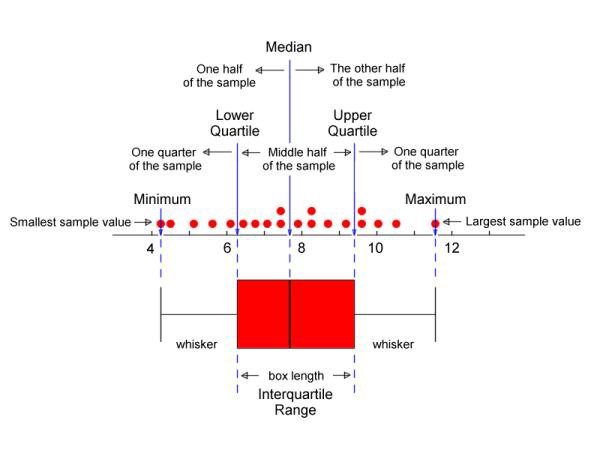

#### Definitions
1. **Median**
   
   The median (middle quartile) marks the mid-point of the data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value and half are less.
   
   
2. **Inter-Quartile Range**

    The middle "box" represents the middle 50% of scores for the group. The range of scores from lower to upeer quartile is referred to as the inner-quartile range. The middle 50% of the scores fall within the inter-quartile range.
   
   
3. **Upper Quartile**

   75% of the scores all fall below the upper quartile.
   
   
4. **Lower Quartile**

   Twenty-five percent of the scores fall below the lower quartile.
  
  
5. **Whiskers**

   The upper and lower whiskers represent scores outside the middle 50%. Whiskers often (but not always) stretch over a wider range of scores than the middle quartile groups. 
  

Now that we have an idea of what the labels mean in box plots, let us try visualize all our categorical features to get an idea of their effect on pricing.

In [ ]:
print("Categorical Features are", list(df_cat.columns))

#export_graphviz(clf, out_file=dot_data, feature_names=feature_names)

In [ ]:
# Box Plot of All the categorical features
plt.figure(figsize=(20, 15))
plt.tight_layout()
plt.suptitle("Features vs Price Box Plots", fontname ='Times New Roman', size = 50, color ='purple')
plt.subplot(3, 3, 1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.title("Number of Doors vs Price")
plt.xlabel("Number of Doors")
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
#sns.regplot(x='enginesize', y='price', data=df)
plt.title("Fuel Type vs Price")
plt.xlabel("Fuel Type")
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.title("Aspiration vs Price")
plt.xlabel("Aspiration")
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.title("Car Body vs Price")
plt.xlabel("Car Body")
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.title("Engine Location vs Price")
plt.xlabel("Engine Location")
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
#sns.regplot(x='drivewheel', y='price', data=df)
plt.title("Drive Wheel Type vs Price")
plt.xlabel("Drive Wheel Type")
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.title("Engine Type vs Price")
plt.xlabel("Engine Type")
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.title("Num of Cylinders vs Price")
plt.xlabel("Number of Cylinders")
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.title("Fuel System vs Price")
plt.xlabel("Fuel System")

plt.show()


#### $Observations$
   1. -  **`Number of Doors`**: Price seems to not rise based on Number of doors a car has. 
   2. - **`Fuel Type`**: Cars that use Diesel are considerably more expensive; so fuel type does have an effect on price.
   3. - **`Car Body Type`**: Covertible and Hardbody Car Body types seem relatively expensive compared to hatchback, sedan and wagon.
   4. - **`Engine location`**: Cars with rear engine location are way more expensive, it's not a lot of them but their prices are way high.
   5. - **`Drive Wheel Type`**: 4-wheel-drive and forward-wheel-drive cars are cheaper. 
   6. - **`Engine Type`**: $ohcv$ engine type is comparatively more expensive.

In [ ]:
list(df_cat.columns)

---
### Symboling
In the auto-insurance and auto business, symboling tells us the riskiness of the car.
- <font color='red'>$\implies$</font> $+3$ indicates that the car is pretty risky
- <font color='red'>$\implies$</font> $-1$ indicates that the car is pretty safe

In [ ]:
# Set figure size
plt.style.use('seaborn')
plt.figure(figsize=(15,15))
plt.tight_layout()

#Set Plot Title for both subplots
plt.suptitle("Symboling vs. Price", fontname ='Times New Roman', size = 30, color ='purple')

# box Plots
plt.subplot(3,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = df, palette=("gist_earth_r"))

# Count /Bar Plots
plt.subplot(3,3,2)
sns.countplot(df.symboling, palette=("gist_earth_r"))

# Pie Chart
plt.subplot(3,3,3)
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.4)
labels=["-1", "-2", "0", "1", "2", "3"]
pie = plt.pie(df['symboling'].value_counts(),
              labels=labels,
              autopct='%1.0f%%', 
              explode=explode, 
              startangle=90, shadow=True, 
              wedgeprops={'edgecolor': 'red'})
plt.show()

#### $Observation$
- <font color='red'>$\implies$</font> We notice that cars rated $0$ and $1$ sell more
- <font color='red'>$\implies$</font> We also notice that cars rated $-1$ are high-priced as those are highly regarded in terms of risk (they are "very safe" so to speak).
- <font color='red'>$\implies$</font> Not many cars rated $-2$ sold much, perhaps because they are also very expensive as -2 insurance rating is also pretty high.


---
### Fuel Type Visualization

In [ ]:
# Make a dataframe of fuel prices
df_fuel = pd.DataFrame(df['fueltype'].value_counts())
# print out df_fuel
df_fuel

In [ ]:
plt.style.use('seaborn')
explode = (0.1, 0.2)
df_fuel.plot.pie(y='fueltype', figsize=(6,10), autopct='%1.0f%%', explode=explode, 
                 startangle=90, shadow=True, wedgeprops={'edgecolor': 'red'})
plt.title("Fuel Type", fontname ='Times New Roman', size = 30, color ='purple')
plt.tight_layout()

#### $Observations$
- <font color='red'>$\implies$</font>$90$% of the cars use gas. Now, does fuel type affect the price of a car? Yes, we saw in the boc plots above that it does- diesel cars cost more than gas cars, and the inference we can make even before is from the fact that there are more gas cars than diesel cars, and we know that the cheaper the product, the more users it will attract.

--- 
### Car Body Type Visualization

In [ ]:
# Make a dataframe of fuel prices
df_carbody = pd.DataFrame(df['carbody'].value_counts())
# print out df_fuel
df_carbody

In [ ]:
df_body=pd.DataFrame(df['carbody'].value_counts()).reset_index()
# create first subplot on the left (1 row, 2 columns, position 1)
plt.subplot(121)
explode = (0.1, 0.1, 0.1, 0.1, 0.4)
labels=["Sedan", "Hatchback", "Wagon", "Hardtop", "Convertible"]
pie = plt.pie(df['carbody'].value_counts(),labels=labels, 
                autopct='%1.0f%%', explode=explode, 
                startangle=90, shadow=True, wedgeprops={'edgecolor': 'yellow'})

# create second subplot on the right (1 row, 2 columns, position 2)
my_colors = 'rgbkymc'  #red, green, blue, black, etc.
plt.subplot(122)
bar = df['carbody'].value_counts().plot(kind='bar', color=list(my_colors))
plt.title("Car Body Types in numbers")
#plt.xlabel("Body type")
#plt.ylabel("Quantity")
plt.show()

In [ ]:
# visualize fule type
plt.style.use('seaborn')
explode = (0.1, 0.1, 0.1, 0.1, 0.4)
df_carbody.plot.pie(y='carbody', figsize=(8,8), autopct='%1.0f%%', explode=explode, startangle=90, shadow=True, wedgeprops={'edgecolor': 'yellow'})
plt.title("Car Body Type Percentages", fontname ='Times New Roman', size = 30, color ='purple')

#### $Observation$
On average, hardtop cars are more expensive, closely followed by convertibles. This supports our earlier assumption that hatchbacks sell more because they are cheap, maybe not because of safety or other factors.


### <align right>Bivariate Data Analysis</align>

In [ ]:
plt.figure(figsize=(15,10))
plt.style.use('seaborn')
sns.pairplot(df[['enginesize', 'price', 'carbody']], hue="carbody");

In [ ]:
sns.scatterplot(x = car_data['fueleconomy'], y = car_data['price'], hue = car_data['carbody'])
#plt.xlabel('Fuel Economy')
#plt.ylabel('Price')
plt.show()

---
---
## <center>Feature Engineering</center>
As we have already seen, we have categorical features in our dataset. However, our machine learning algorithm can only read numerical values; so it is of paramount importance to encode those features into numerical values. 

We will make use of LabelEncoding and OneHotEncoder for their various benefits over other ways like <i><font color='red'>DictVectorizer</font></i> and <i><font color='red'>Pandas `get_dummies`</font></i>.

Let's get on it right away.

In [ ]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

# Instantiate labelencoder 
le = LabelEncoder()

# Apply le on categorical feature columns
df_cat_enc = df_cat.apply(le.fit_transform)

In [ ]:
car_data = pd.concat([df_num, df_cat_enc], axis=1, ignore_index=False)
car_data.head(2)

#### $Observation$
Now that we have successfully encoded our categorical data and concartenated them with numerical data, we shall go ahead into the next big step... Feature Selection!

---
## <center>Feature Selection</center>
This is the process of selecting features which are most relevant in predicting the output variable.
- <font color='red'>$\implies$</font> It helps reduce data dimensionaluty and 
- <font color='red'>$\implies$</font> Ensures that models' accuracy can be trusted when those features are out. Learn more [here](https://en.wikipedia.org/wiki/Feature_selection).

After looking at both numerical and categorical variables, we can be certain about how some of those features affect car pricing.
We saw that the following numerical features have medium to storng correlations with price:

- 
    1. Wheelbase
    2. Car length
    3. Car Width
    4. Curb weight
    5. Engine Size
    6. Bore Ratio 
    7. Horsepower
    8. Fuel Economy

### <i>Variance Threshold</i>
In this project we will set threshold to 0.65; so any feature with a correlation coefficient greater than or equal to $0.65$ shall be labelled a **<font color='red'>$Strong$ $Feature$</font>** and make a cut in our feature selection process. 

Let's go ahead and see which features have a correlation coefficient $\geq$ $0.5$ among the numerical features.

In [ ]:
#df[['wheelbase', 'carlength', 'carwidth', 'curbweight','enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']].corr().T

#df_cardims_corr
strong_corr = df_num.corr().round(5)

# Correlation of features vs price only
# Set thrashhold: anything greater or equal to 0.65 is good
num_threshold = 0.5
f = abs(strong_corr['price'])
output_f = pd.DataFrame(f[f>num_threshold])
output_f

#### $Observation$ 
We see the above numerical features can be used in predicting the target. 

---
We can safely say that the following features play the biggest part in predicting car prices:
1. Wheelbase
2. Car length
3. Car width
4. Curb weight
5. Engine size
6. Horsepower
7. Fuel economy
8. Aspiration
9. Car Body
10. Engine Type
11. Brand 
12. Fuel Type
13. Drive Wheel
14. Cylinder Number
15. Bore Ratio

# <center>Data Modeling</center>
Taking into account the above, let's have them grouped into one dataframe.

In [ ]:
auto = car_data[['wheelbase', 'carlength', 'carwidth', 'curbweight', 
                 'enginesize', 'boreratio', 'horsepower', 'aspiration', 
                 'carbody', 'enginetype', 'drivewheel', 'cylindernumber', 
                 'fueltype', 'fueleconomy', 'price',]]

In [ ]:
auto.head()

### Splitting the Data into Training and Testing sets

In [ ]:
# Split into target variable and independent variables
X = auto.drop(['price'], axis = 1)

# target
y = auto['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

Let's check the sizes of the training and testing sets. 

In [ ]:
#print('-'*48)
print('X_train has', X_train.shape[0], 'rows, y_train also has', y_train.shape[0], 'rows')
print('-'*48)
print('X_test has', X_test.shape[0], 'rows, y_test also has', y_test.shape[0], 'rows')
print('-'*48)
print('X_train has', X_train.shape[1], 'features; X_test also has', X_test.shape[1], 'rows')

So train sets match, with $143$ entries, and <i>`X_train`</i> and <i>`X_test`</i> also match, with $14$ rows. 

---
# <center>Data Modeling</center>
## Linear Regression Model
### 1. Training the Decision Tree Regression Model
   > - Assign `LinearRegresson` to the variable **"lin_reg-mod"**
   > - Then we fit the ***$X$_$train$*** and ***$y$_$train$*** data to the model using `lin_reg_mod.fit()` function.

In [ ]:
# Create a linear regressor
lin_reg_mod = LinearRegression()

# Train the model using the X_train  and y_train sets
lin_reg_mod.fit(X_train, y_train)

### 2. Model Prediction on Test Data
> - Here we predict the results of the test set 
> - We use `lin_reg_mod.predict()` function and assign it to the variable "***lin_reg_y_test_pred***".

In [ ]:
# Model prediction on test data
lin_reg_y_test_pred = lin_reg_mod.predict(X_test)
#y_pred_train = lin_reg_mod.predict(X_train)b

### 3. Model Evaluation

- **R-Square** - $R^2$

In [ ]:
# Evaluation Metrics
# RSquare
from sklearn.metrics import r2_score

# Print RSquare Score for train data
#print("Train data R-squared score: {}".format(r2_score(y_true = y_train, y_pred = y_pred_train)))

# Print RSquare Score for test data
print("Test data R-squared score for Linear Regression Model is {}".format(r2_score(y_test, lin_reg_y_test_pred)))

---
## Decision Tree Regressor

### 1. Training the Decision Tree Regression Model
   > - Assign `DecisionTreeRegressor` to the variable **"dt_regressor"**
   > - Then we fit the ***$X$_$train$*** and ***$y$_$train$*** data to the model using `dt_regressor.fit()` function.

In [ ]:
# Assign DecisionTreeRegressor to the variable "dt_regressor"
dt_regressor = DecisionTreeRegressor(random_state=0)
# Fit the training data to the model
dt_regressor.fit(X_train, y_train)

 ###  2. Model Prediction: Predicting the Results
> - Here we predict the results of the test set with which the model trained on the training set values; 
> - We use `dt_regressor.predict()` function and assign it to the variable "***dtr_y_test_pred***".

In [ ]:
#dt_y_train_pred = dt_regressor.predict(X_train)
# Predict the results
dt_y_test_pred = dt_regressor.predict(X_test)

### 3. Model Evaluation

In [ ]:
# Evaluate the Model
dt_regressor.score(X_test, y_test)
# Evaluate the model
print("Test dataset df_regressor score for Decision Tree Regression Model is {}".format(dt_regressor.score(X_test, y_test)))

---
## Random Forest Regressor
### 1. Training the Decision Tree Regression Model on the training dataset
> - Assign `RandomForestRegressor` to the variable **"rf_regressor"**
> - Then we fit the ***$X$_$train$*** and ***$y$_$train$*** data to the model using `rf_regressor.fit()` function.

In [ ]:
# Assign the RandomForestRegressor to rf
rf_regressor = RandomForestRegressor(n_estimators = 100,
                           criterion = 'mse', 
                           random_state = 0,
                           n_jobs = -1)
# Fit the Model with training data
rf_regressor.fit(X_train, y_train)

### 2. Model Prediction: Predicting the Results
> - Here we predict the results of the test set with which the model trained on the training set values; 
> - We use `regressor.predict()` function and assign it to the variable "***rf_y_test_pred***".

In [ ]:
# Model Prediction
#rf_train_pred = rfr.predict(X_train)
rf_y_test_pred = rf_regressor.predict(X_test)

### 3. Model Evaluation

In [ ]:
# Evaluate the model
print("Test dataset R-squared score for Random Forest Regressor Model is {}".format(rf_regressor.score(X_test, y_test)))

In [ ]:
print("Linear Regression RSquared score is {}".format(r2_score(y_test, lin_reg_y_test_pred)))
print("Decision Tree Regression Score is   {}".format(dt_regressor.score(X_test, y_test)))
print("Random Forest Regressor Score is    {}".format(rf_regressor.score(X_test, y_test)))

---
### Comparing Real $vs.$ Predicted Values
- Let's display the values of *y_test* as __"Real Values"__ and *lin_reg_y_test_pred* as __"Predicted Values"__ in a Pandas DataFrame.

In [ ]:
lr_df = pd.DataFrame({'Real Values': y_test, 'Predicted Values': lin_reg_y_test_pred})
dt_df = pd.DataFrame({'Real Values': y_test, 'Predicted Values': dt_y_test_pred})
rf_df = pd.DataFrame({'Real Values': y_test, 'Predicted Values': rf_y_test_pred})

### Visualizing Models Results

In [ ]:
fig = plt.figure(figsize=(25, 10))
#plt.title()
#plt.subplot(2, 2, 1)
# Regression Scatter Plot for Compression Ratio
sns.regplot(x=lr_df['Real Values'], y=lr_df['Predicted Values'], data=lr_df, 
            scatter_kws = {'color': 'green', 'alpha':0.5,"s":80, "cmap":"plasma", 'marker':'+'},
            line_kws = {'color': 'red', 'alpha':0.5, 'lw':4, 'label':'Linear Reg'})
sns.kdeplot(lr_df['Real Values'], lr_df['Predicted Values'], cmap="Blues")
plt.legend()
sns.regplot(x=dt_df['Real Values'], y=dt_df['Predicted Values'], data=dt_df, 
            scatter_kws = {'color': 'maroon', 'alpha':0.6,"s":90, "cmap":"Blues", 'marker':'+'},
            line_kws = {'color': 'darkblue', 'alpha':0.7, 'lw':4, 'label':'Decision Tree'})
sns.kdeplot(lr_df['Real Values'], lr_df['Predicted Values'], cmap="Blues")
plt.legend()
sns.regplot(x=rf_df['Real Values'], y=rf_df['Predicted Values'], data=rf_df, 
            scatter_kws = {'color': 'cyan', 'alpha':0.8,"s":10, "cmap":"Blues", 'marker':'+'},
            line_kws = {'color': 'magenta', 'alpha':0.8, 'lw':4, 'label':'Random Forest'})
sns.kdeplot(lr_df['Real Values'], lr_df['Predicted Values'], cmap="Greens", shade=False)
plt.legend()

#plt.subplot(2, 2, 2)
#plt.bar(lin_reg, lin_reg.values())

$Observation$:

We see that regression plots for the predicted values $vs.$ actual price values are pretty similar- more so Decision Tree and Random Forest regressors. 

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 5))
# Linear Reg Model Predictions 
sns.lineplot(x = y_test.index, y = y_test, label = "Actual", color = "blue", ax = ax)
sns.lineplot(x = y_test.index, y = lin_reg_y_test_pred, label = "Predictions", color = "red", ax = ax)
ax.set_title("Price: Actual vs Predicted values for Linear Reg Model", fontname ='Times New Roman', size = 30, color ='purple')
ax.set_xlabel("Index")
ax.set_ylabel("Price")

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 5))
#
sns.lineplot(x = y_test.index, y = y_test, label = "Actual", color = "blue", ax = ax)
sns.lineplot(x = y_test.index, y = dt_y_test_pred, label = "Predictions", color = "red", ax = ax)
ax.set_title("Price: Actual vs Predicted values for Decision Tree Model", fontname ='Times New Roman', size = 30, color ='purple')
ax.set_xlabel("Index")
ax.set_ylabel("Price")

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 5))

sns.lineplot(x = y_test.index, y = y_test, label = "Actual", color = "blue", ax = ax)
sns.lineplot(x = y_test.index, y = rf_y_test_pred, label = "Predictions", color = "red", ax = ax)
ax.set_title("Price: Actual vs Predicted values for Random Forest Model", fontname ='Times New Roman', size = 30, color ='purple')
ax.set_xlabel("Index")
ax.set_ylabel("Price")

# <center>Conclusion</center>
- After using 3 different models- Linear Regression Model, Decision Tree Regression Model and Random Forest Regression Model, we see that Random Forest Regressor scored about 90.82%, which would be the model of choice for this project. 

---
---